# Analysis Assignment 1
Ahilan Kumaresan

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rng = np.random.default_rng(seed=42) # Random Number Generator Function
mean_x=0; 
sigma_1 = 1.5; sigma_2 = 1 
N=10_000

i)  Plot a histogram of x1 values and of x2 values for the case σa = 1 and verify that the calculated
sample standard deviations match what you expect from the theory calculation in (a).

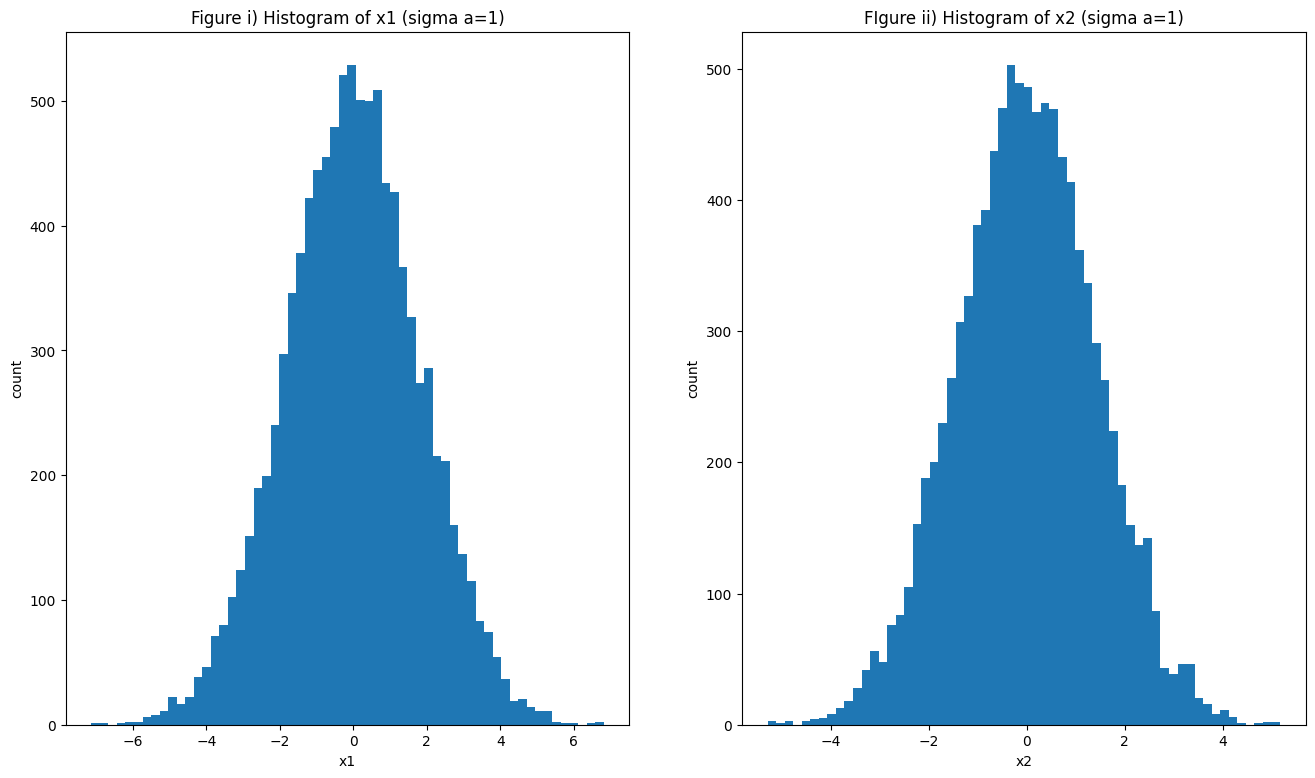

In [11]:
sigma_a = 1
mean_a = 0.0

def simulate(sigma_a):
    x1R = rng.normal(mean_x,sigma_1,N)
    x2R = rng.normal(mean_x,sigma_2,N)

    a = rng.normal(mean_x,sigma_a,N)

    x1 = x1R + a
    x2 = x2R + a
    return x1, x2


x1 , x2 = simulate(sigma_a)

plt.figure(figsize=(16,9))
plt.subplot(1, 2, 1)

plt.hist(x1, bins=60)
plt.title("Figure i) Histogram of x1 (sigma a=1)")
plt.xlabel("x1")
plt.ylabel("count")


plt.subplot(1, 2, 2)
plt.hist(x2, bins=60)
plt.title("FIgure ii) Histogram of x2 (sigma a=1)")
plt.xlabel("x2")
plt.ylabel("count")

#plt.tight_layout() # Ensures proper spacing and prevents overlapping
plt.show()


In [4]:
def sample_stats(x1, x2):
    # ddof=1 gives standard deviation
    s1 = np.std(x1, ddof=1)
    s2 = np.std(x2, ddof=1)
    cov = np.cov(x1, x2, ddof=1)[0, 1]
    rho = cov / (s1 * s2)
    return s1, s2, cov, rho

def theory(sigma_a):
    var1 = sigma_1**2 + sigma_a**2
    var2 = sigma_2**2 + sigma_a**2
    cov  = sigma_a**2
    rho  = cov / np.sqrt(var1 * var2)
    return np.sqrt(var1), np.sqrt(var2), cov, rho

s1, s2, cov, rho = sample_stats(x1, x2)
t_s1, t_s2, t_cov, t_rho = theory(sigma_a)

print("sigma_a = 1")
print(f"Sample std x1 = {s1:.6f} | Theory std x1 = {t_s1:.6f}")
print(f"Sample std x2 = {s2:.6f} | Theory std x2 = {t_s2:.6f}")

sigma_a = 1
Sample std x1 = 1.806713 | Theory std x1 = 1.802776
Sample std x2 = 1.409751 | Theory std x2 = 1.414214


The Values Match and are within 1% of the expected Values.

ii) Covariance and correlation for sigma_a = 0 and 1

In [5]:

for sigma_a in [0.0, 1.0]:
    x1, x2 = simulate(sigma_a)
    s1, s2, cov, rho = sample_stats(x1, x2)
    t_s1, t_s2, t_cov, t_rho = theory(sigma_a)

    print(f"sigma_a = {sigma_a}")
    print(f"Sample cov  = {cov:.6f} | Theory cov  = {t_cov:.6f}")
    print(f"Sample rho  = {rho:.6f} | Theory rho  = {t_rho:.6f}")
    print()


sigma_a = 0.0
Sample cov  = -0.011205 | Theory cov  = 0.000000
Sample rho  = -0.007468 | Theory rho  = 0.000000

sigma_a = 1.0
Sample cov  = 1.041582 | Theory cov  = 1.000000
Sample rho  = 0.399611 | Theory rho  = 0.392232



Yes we match with a.

iii) Scatter plots for sigma_a = 0 and 1

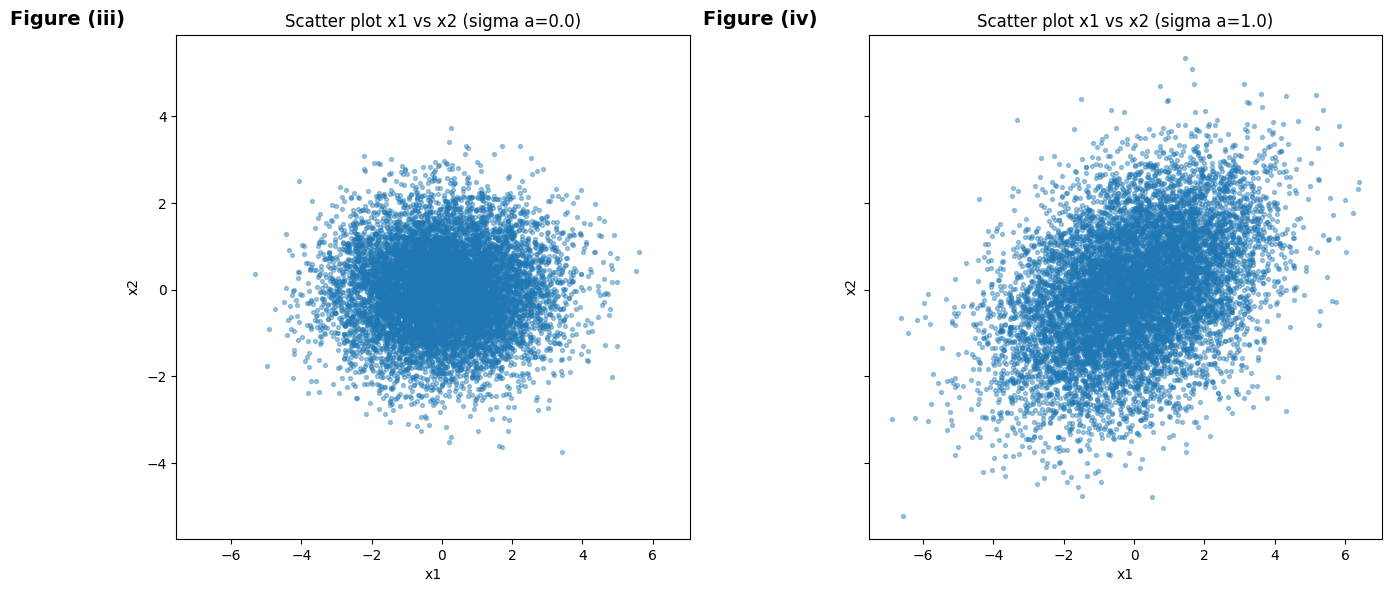

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)
sigmas = [0.0, 1.0]
labels = ["Figure (iii)", "Figure (iv)"] 

for sigma_a, ax, label in zip(sigmas, axs, labels):
    x1, x2 = simulate(sigma_a)

    ax.scatter(x1, x2, s=8, alpha=0.4)
    ax.set_title(f"Scatter plot x1 vs x2 (sigma a={sigma_a})")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    
    ax.text(-0.1, 1.05, label, transform=ax.transAxes, 
            fontsize=14, fontweight='bold', va='top', ha='right')

plt.tight_layout()
plt.show()
